[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/franckalbinet/mirzai/blob/main/nbs/paper/09_figures_global_vs_local.ipynb)

# 5.3. Global vs. local modelling

> Compare test PLSR & CNN performances on distinct Soil Taxonomy Orders when trained on all data indistinctly or by Soil Taxonomy orders.

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive',  force_remount=False)
    !pip install mirzai
else:
    %load_ext autoreload
    %autoreload 2

In [ ]:
# Python utils
from pathlib import Path
import pickle

from mirzai.vis.core import (centimeter, PRIMARY_COLOR, 
                             set_style, DEFAULT_STYLE)

# Data vis.
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Data science stack
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Input data

To generate the learning curves for both the PLSR and CNN models, run the following notebooks:
* [PLSR training & evaluation](paper.plsr.train_eval.html)
* [CNN training & evaluation](paper.cnn.train_eval.html)

Instead, we load already generated and saved data: `global_vs_local.pickle`.

In [ ]:
src_dir = Path('dumps')

In [ ]:
fname = 'global_vs_local.pickle'

plsr_eval = pickle.load(open(src_dir/'plsr'/fname, "rb"))
cnn_eval = pickle.load(open(src_dir/'cnn'/fname, "rb"))

In [ ]:
cnn_eval

{'global': {'r2': {'mean': [0.7676331478787332,
    0.7426117015170665,
    0.7447822268117752],
   'std': [0.02264828790526842, 0.07670269031321013, 0.06303328480007991]},
  'mape': {'mean': [27.362060993909836, 47.8833418753412, 26.85565337538719],
   'std': [1.171648213272994, 10.194858798150458, 3.2722564855592804]}},
 'local': {'r2': {'mean': [0.7727136487719102,
    0.691142579693905,
    0.6691275530909808],
   'std': [0.019084647824623407, 0.08809393616324758, 0.06941770320711035]},
  'mape': {'mean': [26.96375921368599, 51.508686112033, 30.958226919174194],
   'std': [1.3522711409175694, 12.377707161654318, 4.237754935060679]}}}

## Plot

In [ ]:
def plot_global_local_metric(data_global, data_local, 
                             labels=['Mollisols', 'Gelisols', 'Vertisols'], 
                             ax=None, delta=0.04, 
                             global_kwargs={}, local_kwargs={}):
    x = np.arange(len(labels)) 
    ax.errorbar(x-delta, data_global['mean'], yerr=data_global['std'], label='Global', **global_kwargs)
    ax.errorbar(x+delta, data_local['mean'], yerr=data_local['std'], label='Local', **local_kwargs)
    ax.set_xticks(x, labels)
    return(ax)

def plot_global_vs_local(plsr, cnn, labels,
                         figsize=(16*centimeter,6*centimeter), dpi=600):
    # Adjust styles
    p = plt.rcParams
    p["xtick.minor.visible"] = False

    # Layout 
    fig = plt.figure(figsize=figsize, dpi=600)
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_title('(a) PLSR', loc='left')

    ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)
    ax1.set_title('(b) CNN', loc='left')

    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1], sharey=ax2)

    # Plots
    global_params = {'fmt':'o', 'mfc':'w', 'ms': 3, 'c': 'C0', 'ecolor': 'C0', 'elinewidth': 1}
    local_params = {'fmt':'o', 'mfc':'w', 'ms': 3, 'c': 'C1', 'ecolor': 'C1', 'elinewidth': 1}
    plot_global_local_metric(plsr['global']['r2'], 
                             plsr['local']['r2'],
                             labels, ax=ax0, global_kwargs=global_params, 
                             local_kwargs=local_params)

    plot_global_local_metric(cnn['global']['r2'], 
                             cnn['local']['r2'],
                             labels, ax=ax1, global_kwargs=global_params, 
                             local_kwargs=local_params)

    plot_global_local_metric(plsr['global']['mape'], 
                             plsr['local']['mape'],
                             labels, ax=ax2, global_kwargs=global_params, 
                             local_kwargs=local_params)

    plot_global_local_metric(cnn['global']['mape'], 
                             cnn['local']['mape'],
                             labels, ax=ax3, global_kwargs=global_params, 
                             local_kwargs=local_params)
        

    # Ornaments
    ax0.set_ylabel('$R^2$ →', loc='top')
    ax2.set_ylabel('MAPE (%) →', loc='top')
    ax0.set_xticklabels([])
    ax1.set_xticklabels([])
    
    handles, labs = ax0.get_legend_handles_labels()
    fig.legend(handles, labs,
               frameon=False, ncol=2, loc='upper center',  
               bbox_to_anchor=(0.4, 0.99))
 
    for ax in [ax0, ax1, ax2, ax3]:
        ax.grid(True, "minor", color="0.85", linewidth=0.2, zorder=-2)
        ax.grid(True, "major", color="0.65", linewidth=0.4, zorder=-1) 

    plt.tight_layout()

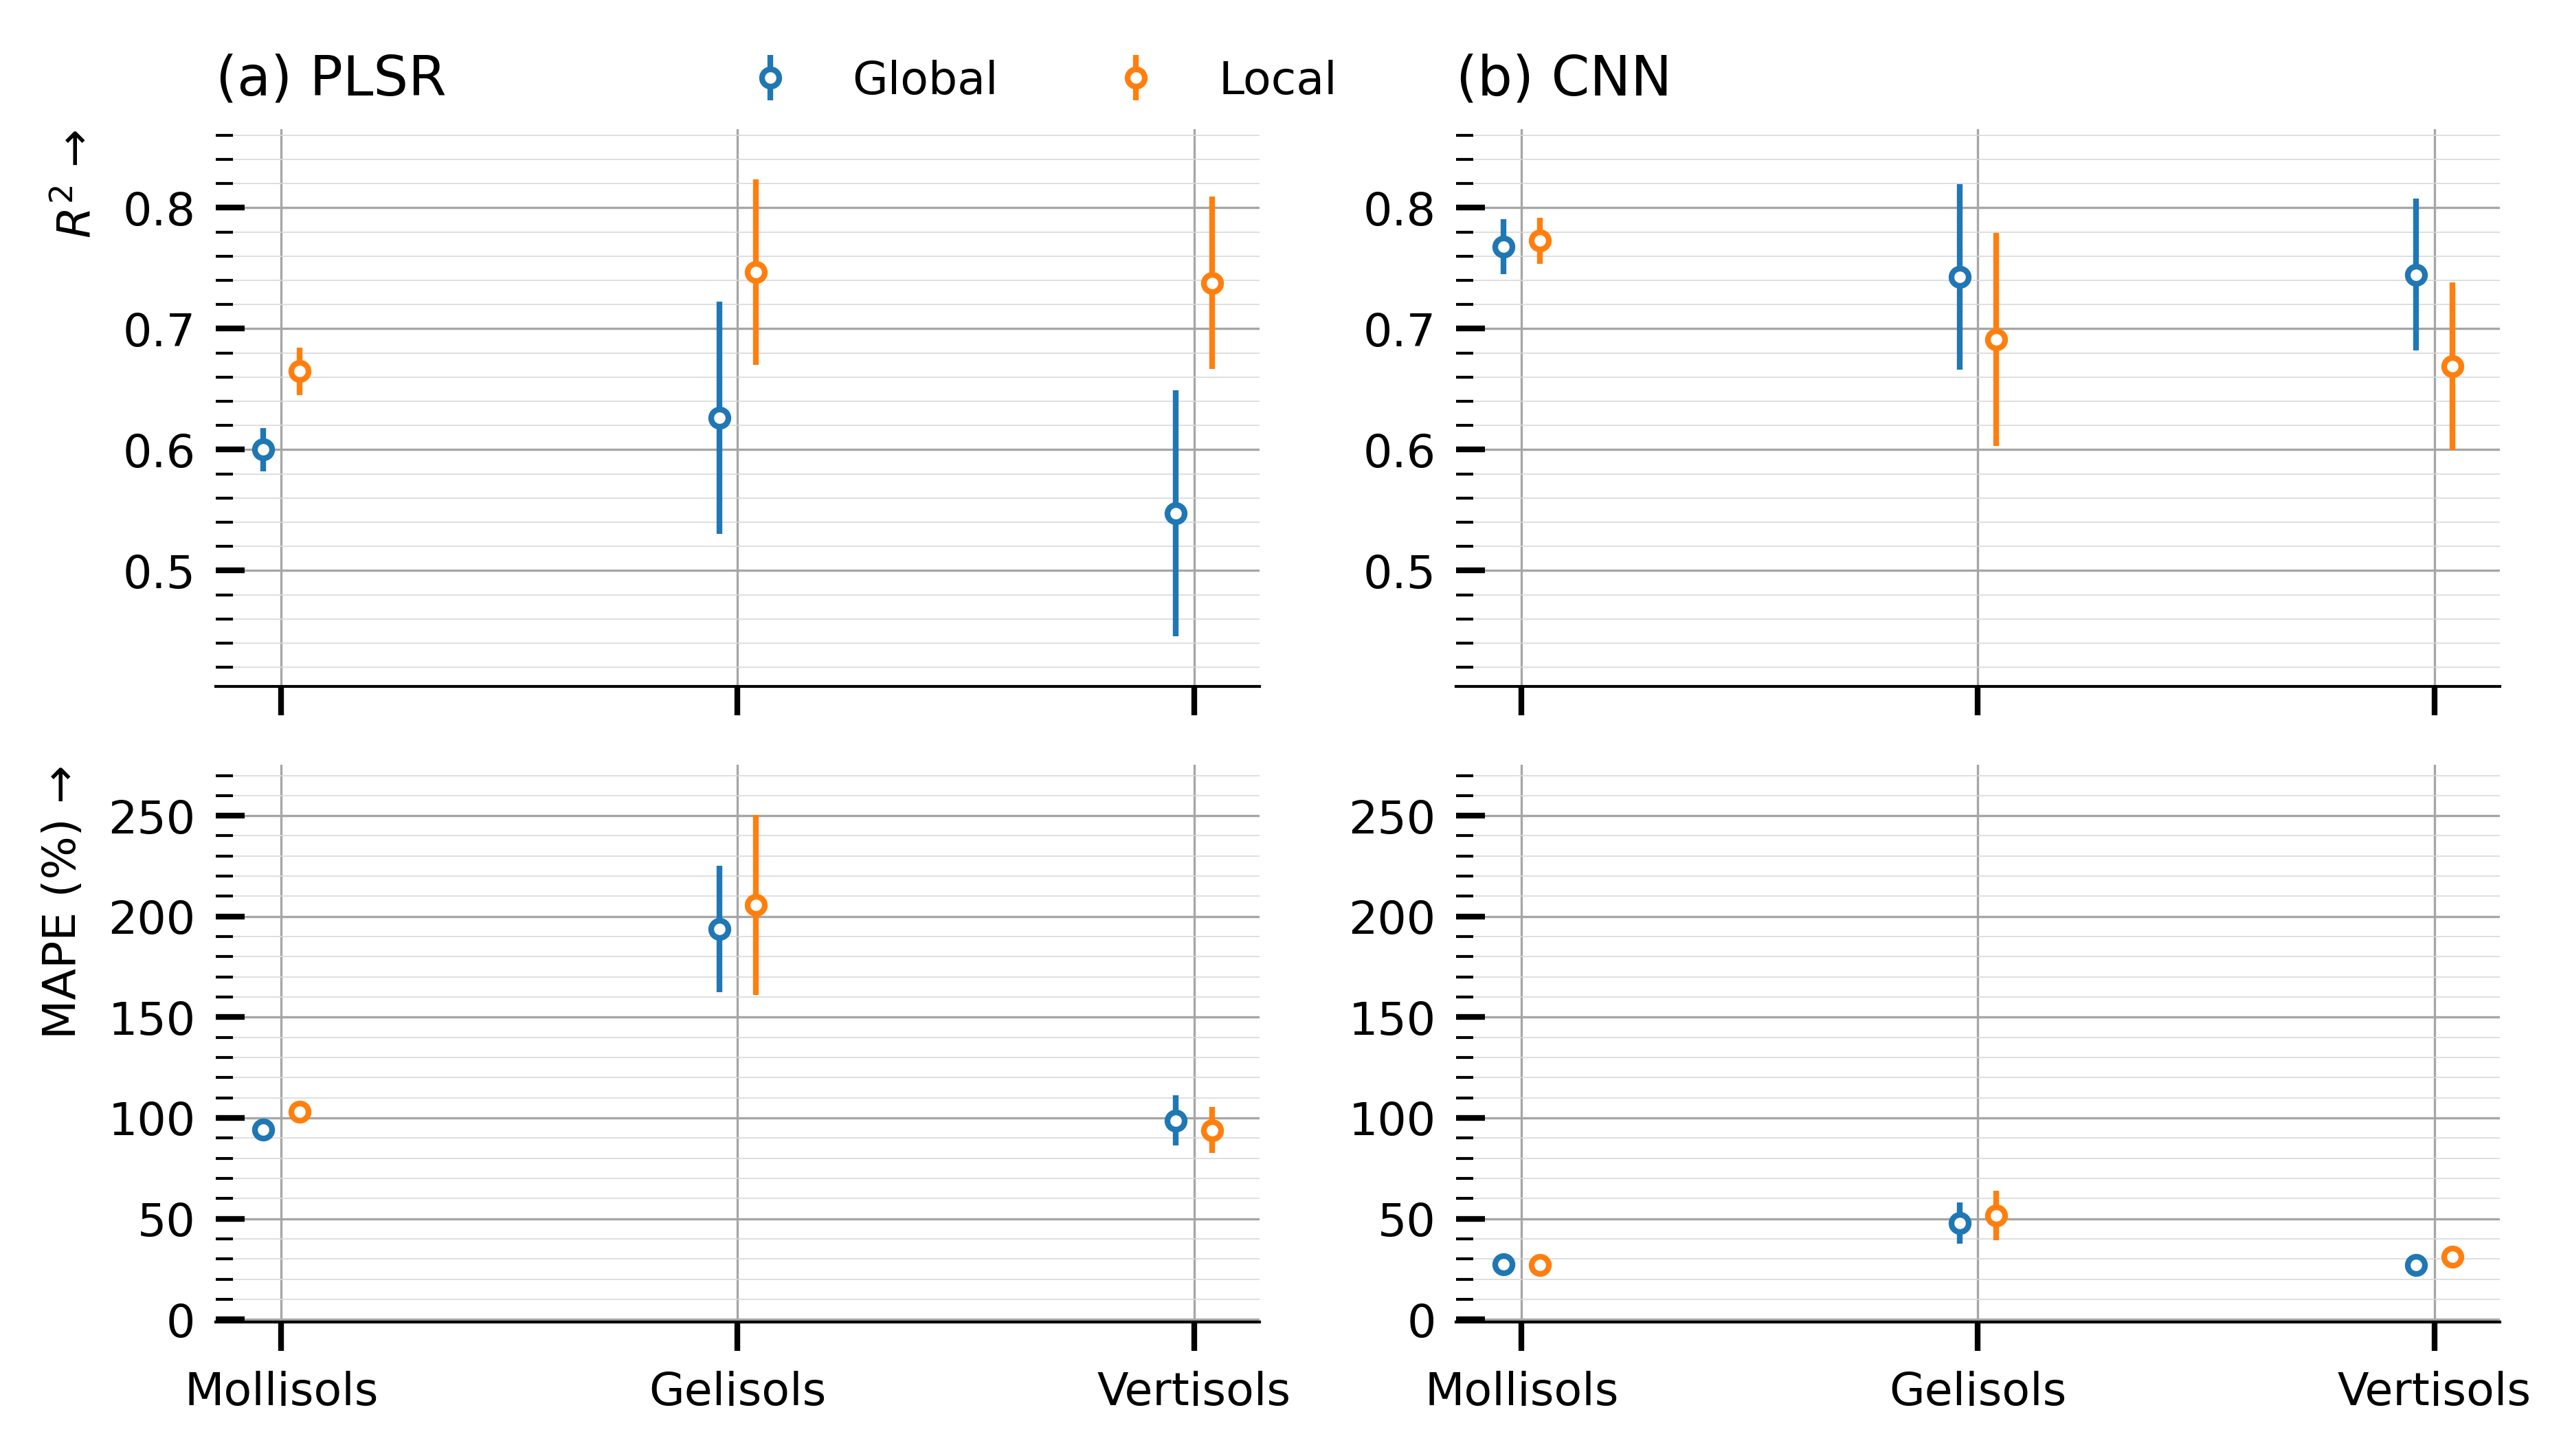

In [ ]:
#FIG_PATH = Path('nameofyourfolder')
FIG_PATH = Path('images')

set_style(DEFAULT_STYLE)
plot_global_vs_local(plsr_eval, cnn_eval, ['Mollisols', 'Gelisols', 'Vertisols'],
                     figsize=(16*centimeter,9*centimeter), dpi=600)

# To save/export it
plt.savefig(FIG_PATH/'global_vs_local.png', dpi=600, transparent=True, format='png')